In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.models import mfx

Can't find epics package. PPM_Imager class will not be supported


In [2]:
# first argument is photon energy, N is a sampling parameter. 
# The wavefront propagation happens on a NxN grid - will affect the resolution of the result.
# Using a GPU will help a lot for N>~256
mfx_sim = mfx.MFX(9500,N=1024)

FWHM in x: 50.063160108007565 microns
FWHM in y: 50.063160108007565 microns
FWHM Divergence (x): 1.6 μrad
FWHM Divergence (y): 1.6 μrad
x is focused
y is focused


In [3]:
# random misalignment of all the transfocator lenses
for i in range(9):
    getattr(mfx_sim,'tfs_{}_x'.format(i+2)).mvr(np.random.rand(1)*10e-6)
    getattr(mfx_sim,'tfs_{}_y'.format(i+2)).mvr(np.random.rand(1)*10e-6)

# set limits
mfx_sim.tfs_z.set_low_limit(-.5)
mfx_sim.tfs_z.set_high_limit(.5)

# test limit
mfx_sim.tfs_z.mv(0.6)
# still zero since it doesn't move outside limit
print(mfx_sim.tfs_z.wm())

# move within limits (relative move)
mfx_sim.tfs_z.mvr(.1)

0


True

In [4]:
# check which crls are in use
for crl in mfx_sim.tfs_list:
    print('crl {} ({}um ROC) inserted: {}'.format(crl.name,crl.roc*1e6,crl.enabled))

crl tfs_2 (500.0um ROC) inserted: True
crl tfs_3 (300.0um ROC) inserted: False
crl tfs_4 (250.0um ROC) inserted: False
crl tfs_5 (200.0um ROC) inserted: False
crl tfs_6 (125.0um ROC) inserted: True
crl tfs_7 (62.5um ROC) inserted: False
crl tfs_8 (50.0um ROC) inserted: False
crl tfs_9 (50.0um ROC) inserted: True
crl tfs_10 (50.0um ROC) inserted: False


In [5]:
# run the simulation
%%capture capt
mfx_sim.propagate()

[<Axes: title={'center': 'DG3_YAG'}, xlabel='X coordinates (microns)', ylabel='Y coordinates (microns)'>,
 <Axes: >,
 <Axes: >]

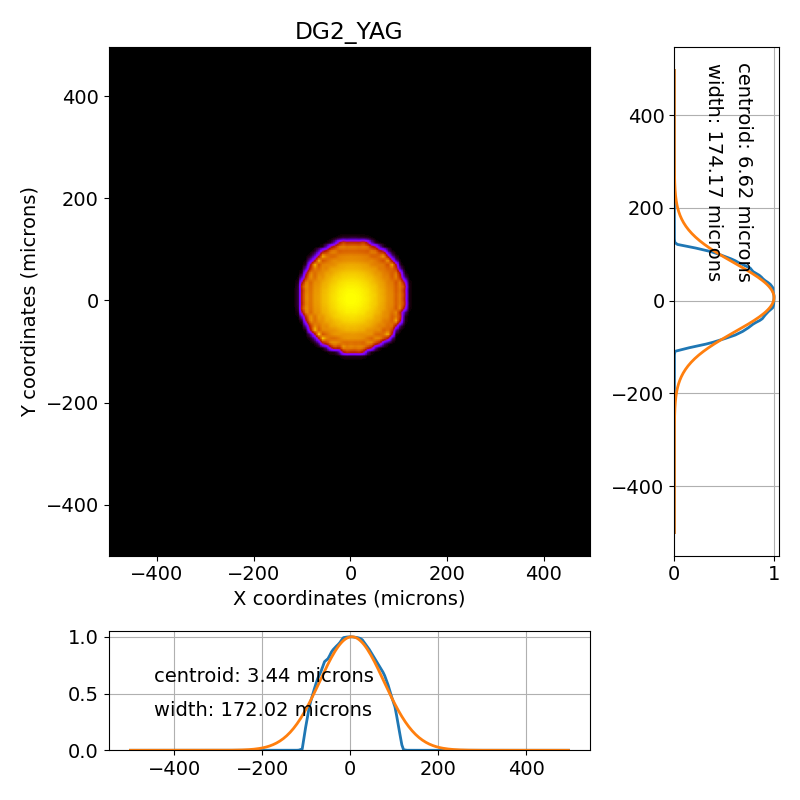

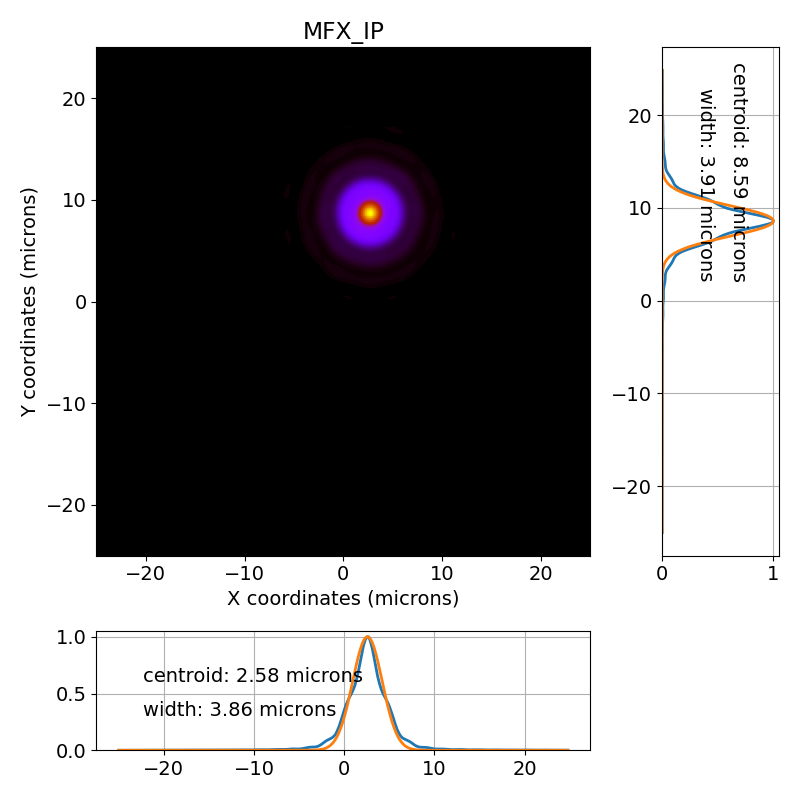

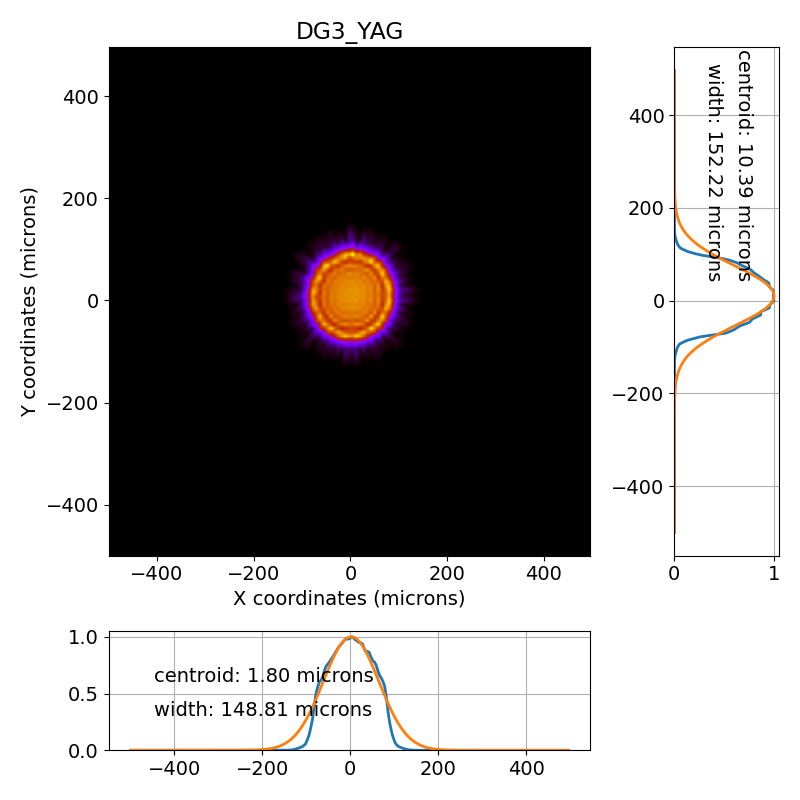

In [6]:
# display results
mfx_sim.beamline.DG2_YAG.view_beam()
mfx_sim.beamline.MFX_IP.view_beam()
mfx_sim.beamline.DG3_YAG.view_beam()

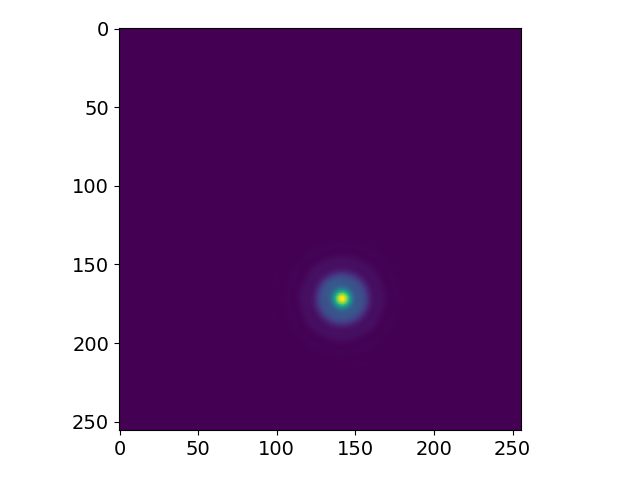

In [10]:
# access to the image array
ip_array = mfx_sim.beamline.MFX_IP.profile
plt.figure()
plt.imshow(ip_array)